<a href="https://colab.research.google.com/github/Kate5-7-2021/INFO-5502-SU2021/blob/main/INFO_5502_Assign7_KNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd                #import necessary packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import (KNeighborsClassifier, NeighborhoodComponentsAnalysis)
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris


In [37]:
iris_data=load_iris()                 #load data

In [38]:
classes={0:'setosa',1:'virginica',2:'versicolour'}      #define classes

In [39]:
iris_class=iris_data.target            #create array of target based on the classes
iris_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [40]:
species=[classes[k] for k in iris_class]    #call the species correspond each target value
species

['setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 '

In [41]:
df=pd.DataFrame(iris_data.data, columns=iris_data.feature_names)  #create dataframe if it is needed
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [42]:
df.shape            #shape of the data out of data frame

(150, 4)

In [43]:
df['iris_class']=iris_class.tolist()    #add class and species columns 
df['species']=species
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_class,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,versicolour
146,6.3,2.5,5.0,1.9,2,versicolour
147,6.5,3.0,5.2,2.0,2,versicolour
148,6.2,3.4,5.4,2.3,2,versicolour


In [44]:
iris_data.data.shape      #again shape of the data

(150, 4)

In [45]:
iris_data.target.shape            #shape of the target

(150,)

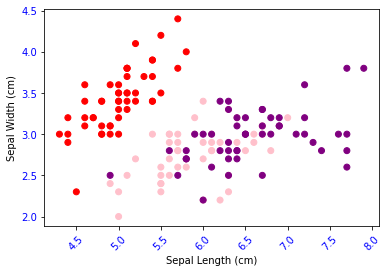

In [46]:
fig, ax = plt.subplots()           #scatter plot to preview the data
sepal_length=df['sepal length (cm)'].to_list()
sepal_width=df['sepal width (cm)'].to_list()
species=['setosa','virginica','versicolour']
colors = {'setosa':'red','virginica':'pink','versicolour':'purple'}
scatter=ax.scatter(sepal_length, sepal_width,c=df['species'].map(colors))
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.xticks(color='blue',rotation=45)
plt.yticks(color='blue')
plt.show()

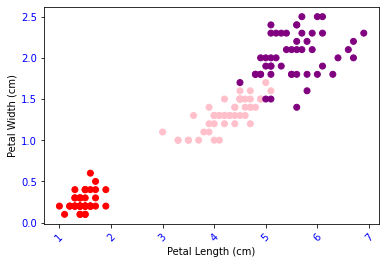

In [47]:
fig, ax = plt.subplots()           #scatter plot to preview the data
sepal_length=df['petal length (cm)'].to_list()
sepal_width=df['petal width (cm)'].to_list()
species=['setosa','virginica','versicolour']
colors = {'setosa':'red','virginica':'pink','versicolour':'purple'}
scatter=ax.scatter(sepal_length, sepal_width,c=df['species'].map(colors))
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.xticks(color='blue',rotation=45)
plt.yticks(color='blue')
plt.show()

In [48]:
x=iris_data.data                   #define x & y
y=iris_data.target

In [50]:
#split dataset to train and test dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=4)

In [51]:
knn= KNeighborsClassifier(n_neighbors=3)  #apply KNN model
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [52]:
print('KNN Score: %.3f' % knn.score(x_test,y_test)) #get KNN score

KNN Score: 0.967


In [53]:
y_pred=knn.predict(x_test)     #define y_pred 
y_pred

array([2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2])

In [59]:
knn.predict(x_test)[0:3]            #if the test data is big to show it evaluation recalts, one can even test few of them

array([2, 0, 2])

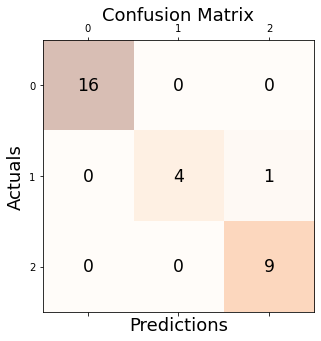

In [54]:
y_pred = knn.predict(x_test)     #draw the confusion matrix to show the performance of model
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [55]:
print('Accuracy: %.3f' %metrics.accuracy_score(y_test, y_pred))  #find accuracy


Accuracy: 0.967


In [60]:
print(classification_report(y_test, y_pred))  #to evaluate the algorithm and find all values necessary for evaluation

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.80      0.89         5
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.93      0.95        30
weighted avg       0.97      0.97      0.97        30



In [61]:
knn1= KNeighborsClassifier(n_neighbors=20)   #KNN model tested with different k value
knn1.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [62]:
print('KNN Score: %.3f' % knn1.score(x_test,y_test))  #model accuracy for another k valu

KNN Score: 0.933


In [63]:
knn_accuracies=[]                 #call the range of the k values to find the optimal k value
k_num=range(1,25)
for k in k_num:
 knn= KNeighborsClassifier(n_neighbors=k)
 knn.fit(x_train, y_train)
 y_pred=knn.predict(x_test)
 knn_accuracies.append(metrics.accuracy_score(y_test, y_pred))
print(knn_accuracies)


[0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667]


Text(0, 0.5, 'Accuracy')

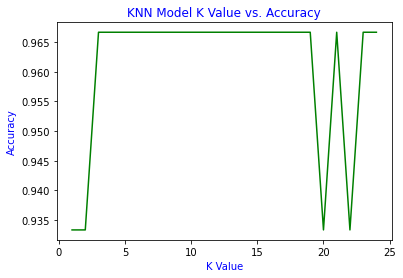

In [64]:
plt.plot(k_num, knn_accuracies, color='g')       #plot the graph of the k range
plt.title('KNN Model K Value vs. Accuracy',color='b')
plt.xlabel('K Value',color='b')
plt.ylabel('Accuracy',color='b')


###**5 and 10 Fold Cross Validation Scores for Testing KNN**


In [93]:
#apply cross validation
knn_cross_test_scores=cross_val_score(knn,x_test,y_test,cv=10)
knn_cross_test_scores

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


array([0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.66666667])

In [94]:
#get the overall accuracy of the cross validation
print("%0.2f%% accuracy with a standard deviation of %0.2f" % (knn_cross_test_scores.mean()*100, knn_cross_test_scores.std()))

53.33% accuracy with a standard deviation of 0.16


In [ ]:
k_cv_score=[]             #call the same k range in cross validation to find the optimal k value
k_cv_num=range(1,25)
for k in k_cv_num:
 knn= KNeighborsClassifier(n_neighbors=k)
 #knn.fit(x_train, y_train)
 #y_pred=knn.predict(x_test)
 knn_cross_test_scores=cross_val_score(knn,x_test,y_test,cv=10)
 k_cv_score.append(knn_cross_test_scores.mean())
print(k_cv_score)


Text(0, 0.5, 'Cross Validation Accuracy')

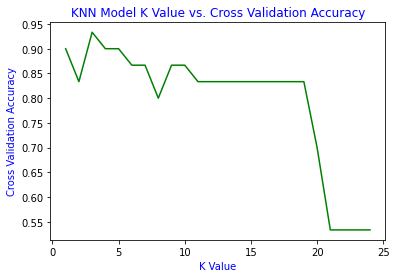

In [96]:
#draw the graph of accuracy for k range from the cross validation
plt.plot(k_cv_num,k_cv_score,color='g') 
plt.title('KNN Model K Value vs. Cross Validation Accuracy',color='b')
plt.xlabel('K Value',color='b')
plt.ylabel('Cross Validation Accuracy',color='b')

In [97]:
#apply cross validation
knn_cross_test_scores=cross_val_score(knn,x_test,y_test,cv=5)
knn_cross_test_scores

array([0.5       , 0.5       , 0.5       , 0.5       , 0.66666667])

In [98]:
#get the overall accuracy of the cross validation
print("%0.2f%% accuracy with a standard deviation of %0.2f" % (knn_cross_test_scores.mean()*100, knn_cross_test_scores.std()))

53.33% accuracy with a standard deviation of 0.07


In [99]:
k_cv_score=[]             #call the same k range in cross validation to find the optimal k value
k_cv_num=range(1,25)
for k in k_cv_num:
 knn= KNeighborsClassifier(n_neighbors=k)
 #knn.fit(x_train, y_train)
 #y_pred=knn.predict(x_test)
 knn_cross_test_scores=cross_val_score(knn,x_test,y_test,cv=5)
 k_cv_score.append(knn_cross_test_scores.mean())
print(k_cv_score)

[0.9, 0.8333333333333334, 0.9333333333333333, 0.8666666666666668, 0.9, 0.8333333333333334, 0.8333333333333334, 0.8666666666666668, 0.8666666666666666, 0.8666666666666666, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.5666666666666667, 0.5666666666666667, 0.5333333333333333, 0.5333333333333333, 0.5333333333333333, 0.5333333333333333, 0.5333333333333333]


Text(0, 0.5, 'Cross Validation Accuracy')

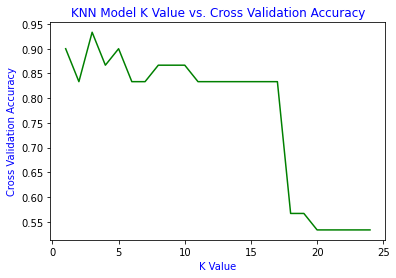

In [100]:
#draw the graph of accuracy for k range from the cross validation
plt.plot(k_cv_num,k_cv_score,color='g') 
plt.title('KNN Model K Value vs. Cross Validation Accuracy',color='b')
plt.xlabel('K Value',color='b')
plt.ylabel('Cross Validation Accuracy',color='b')